# 1. Definição do Problema

### Desafio 2 - Conhecendo melhor nossa base de consumidores: qual estado possui os clientes com melhores pontuações de crédito?

### Objetivo 

Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. Para realizar a verificação inicial, precisamos de alguns valores. Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

# 2. Entendimento dos Dados 

### Instalação dos Pacotes

In [2]:
# Libs para manipulação
import pandas as pd
import numpy as np

# Libs para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Arquivo Json
import json

### Coleta dos Dados

In [3]:
# Carregando o dataframe
df = pd.read_csv('desafio1.csv')

### Descrição dos Dados



- ‘id’: Identificador do cliente 
- ‘sobrenome’: Sobrenome do cliente 
- ‘pontuacao_credito’: Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente) 
- ‘estado_residencia’: Estado de residência do cliente 
- ‘genero’: Gênero do cliente 
- ‘nivel_estabilidade’: Nível de estabilidade do cliente 
- ‘saldo_conta’: Saldo disponível na conta do cliente 
- ‘numero_produtos’: Número de produtos que o cliente consome 
- ‘possui_cartao_de_credito’: Possui um cartão de crédito cadastrado 
- ‘membro_ativo’: Membro acessa e consome frequentemente

### Conhecendo o Dataframe

In [4]:
# Verifica as 10 primeiras linhas
df.head(10)

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1
5,6,db5cf32c3fbc7c5d8f8313afca1d099de6dc055f,a596384ca70664af4c5fac9f935cff186b8e8bc0,645,RS,M,44,8,113755.78,2,1,0
6,7,8f3cc64a0a84bab38fefb030f09757d0cbf03bb2,abec3e525ab40e45975c91d4fa2bc7b318d93de4,822,SC,M,50,7,0.00,2,1,1
7,8,6704b822c203e2dda9f225dfc4f1bed2ae9044e6,336b42483e6a17f48eb040a251b5d6e64d1351a9,376,PR,F,29,4,115046.74,4,1,0
8,9,35f41954a87f722a3960e5fa8ce898a09398a564,53a417796c777851003b3f2431e8eef5625ec15b,501,SC,M,44,4,142051.07,2,0,1
9,10,f110be36fc6171a7da472b9cbac8698df880aac6,b89d09fc7719cb3c4a87e4a61cb87b3465e9d8ff,684,SC,M,27,2,134603.88,1,1,1


In [5]:
# Verficando a dimensão
df.shape

(7000, 12)

In [6]:
# Verficando o tipo dos dados
df.dtypes

RowNumber                     int64
id                           object
sobrenome                    object
pontuacao_credito             int64
estado_residencia            object
genero                       object
idade                         int64
nivel_estabilidade            int64
saldo_conta                 float64
numero_produtos               int64
possui_cartao_de_credito      int64
membro_ativo                  int64
dtype: object

In [7]:
# Verificando missing values
df.isna().sum()

RowNumber                   0
id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

In [8]:
# Verfica as informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
RowNumber                   7000 non-null int64
id                          7000 non-null object
sobrenome                   7000 non-null object
pontuacao_credito           7000 non-null int64
estado_residencia           7000 non-null object
genero                      7000 non-null object
idade                       7000 non-null int64
nivel_estabilidade          7000 non-null int64
saldo_conta                 7000 non-null float64
numero_produtos             7000 non-null int64
possui_cartao_de_credito    7000 non-null int64
membro_ativo                7000 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 656.3+ KB


# 3. Análise Exploratória


### **Estatística Geral do Dataframe**

In [9]:
df.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


### **Estátistica Descritiva Univariada**

 **Investigando a variável pontuacao_credito)**

In [10]:
# Média
df['pontuacao_credito'].mean()

649.787

In [11]:
# Mediana 
df['pontuacao_credito'].median()

651.0

**Observação**: Aparentemente sem outliers na variável pontuacao_credito

In [12]:
# Desvio padrão
df['pontuacao_credito'].std()

97.0462786489001

In [13]:
# Assimetria - Skewness
df['pontuacao_credito'].skew()

-0.046834946542205005

**Observação**: Assimetria negativa.

In [14]:
# Dispersão - Kurtose
df['pontuacao_credito'].kurtosis()

-0.4629012469890421

**Observação**: Curva Platicúrtica (> 0)

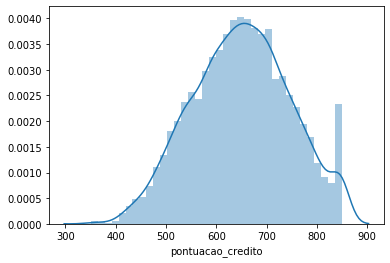

In [15]:
# Visualizando a distribuição
sns.distplot(df['pontuacao_credito'])
plt.show()

**Observação**: Vemos uma concentração de pontuação de crédito entre 500 a 800 pontos.

 **Investigando a variável estado_residencia**

In [16]:
# Estados presente no dataframe
df['estado_residencia'].value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

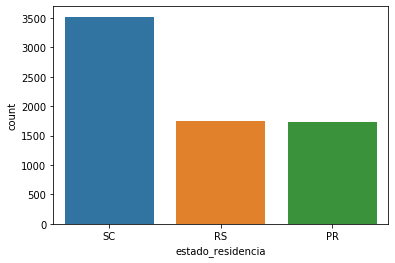

In [17]:

sns.countplot(x = 'estado_residencia', data = df)

**Observação**: O gráfico mostra que o estado que tem mais cliente no dataframe é Santa Catarina.

## **Estatística Descritiva Multivariada**

### **Perguntas**: 

- Qual estado possuí os clientes com melhores pontuação de crédito?

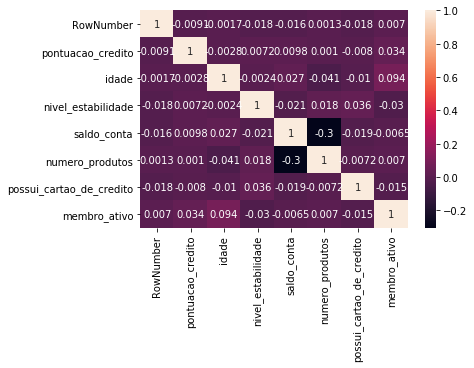

In [18]:
# Correlações entre variáveis
sns.heatmap(df.corr(), annot = True)
plt.show()

In [20]:
# Estado com média de pontuação de crédito mais alto
df.groupby('estado_residencia')['pontuacao_credito'].mean().reset_index().sort_values('pontuacao_credito', ascending = False)

,estado_residencia,pontuacao_credito
1,RS,651.105143
2,SC,649.537653
0,PR,648.961294


In [19]:
# Cria a variável para o desafio
df1 = df.groupby('estado_residencia')['pontuacao_credito'].agg(
    [
        pd.Series.mode,
        pd.Series.median,
        pd.Series.mean,
        pd.Series.std
    ])

In [20]:
# Filtra somente as repostas das perguntas de negócio
df1.columns = ['moda','mediana','media','desvio_padrao' ]

In [21]:
# Verificando as respostas
df1 = df1.T


In [22]:
# Convertendo para json
df1.to_json('submission.json')